In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
base_path = '/home/rsaha/projects/dm_alchemy/src/saved_models/'
architecture = 'encoder'
model_size = 'xsmall'
task_type = 'classification_multi_label'
shop = '2'
qhop = '1'
seed_list = [0]
epoch_num = 7

file_path = f'{base_path}{model_size}/{architecture}/{task_type}/shop_{shop}_qhop_{qhop}/'

In [3]:
predictions_list = []
targets_list = []

epochs = 60
for seed in tqdm(seed_list):
    seed_x_predictions = []
    seed_x_targets = []
    for epoch in range(epochs):
        file_name = f'{file_path}seed_{seed}/predictions/predictions_{task_type}_epoch_{epoch+1:03d}.npz'
        predictions = np.load(file_name, allow_pickle=True)['predictions']
        seed_x_predictions.append(predictions)
    predictions_list.append(np.array(seed_x_predictions))
        
    for epoch in range(epochs):
        file_name = f'{file_path}seed_{seed}/predictions/targets_{task_type}_epoch_{epoch+1:03d}.npz'
        targets = np.load(file_name, allow_pickle=True)['targets']
        seed_x_targets.append(targets)
    targets_list.append(np.array(seed_x_targets))
   

100%|██████████| 1/1 [00:11<00:00, 11.32s/it]


In [25]:
predictions_list[0]

array([[[0, 1, 0, ..., 0, 1, 0],
        [0, 1, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 1, ..., 0, 1, 0],
        [0, 0, 1, ..., 0, 1, 0],
        [0, 0, 1, ..., 0, 1, 0]],

       [[0, 1, 0, ..., 0, 1, 0],
        [0, 1, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 1, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 0, 1, 0]],

       [[0, 1, 0, ..., 0, 1, 0],
        [0, 1, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 1, 0, 0],
        ...,
        [1, 0, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 0, 1, 0]],

       ...,

       [[0, 1, 0, ..., 0, 1, 0],
        [0, 1, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 1, ..., 0, 1, 0],
        [0, 1, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 0, 1, 0]],

       [[0, 1, 0, ..., 0, 1, 0],
        [0, 1, 0, ..., 0, 1, 0],
        [1, 0, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 1, ..., 

In [26]:
# for seed_idx, seed_predictions in enumerate(predictions_list):
seed_idx = 0
seed_predictions = predictions_list[seed_idx]
for epoch_idx, epoch_predictions in enumerate(seed_predictions):
    if epoch_predictions.shape != predictions_list[0][1].shape:
        print("epoch_predictions shape:", epoch_predictions.shape)
        file_name = f'{file_path}seed_{seed_list[seed_idx]}/predictions/predictions_{task_type}_epoch_{epoch_idx+1:03d}.npz'
        print(f"Shape mismatch found in file: {file_name}")

In [27]:
predictions_list[0].shape

(60, 265384, 13)

In [7]:
# Create a dummy array with shape (3, *predictions_list[0].shape)
dummy_array = np.zeros((len(seed_list), *predictions_list[0].shape))

for seed_idx in seed_list:
    print(f"Processing seed {seed_idx}...")
    dummy_array[seed_idx] = predictions_list[seed_idx]

Processing seed 0...


In [8]:
dummy_array.shape

(1, 60, 265384, 13)

In [6]:
# Average the predictions across seeds.
predictions_list = np.array(predictions_list)
predictions_list = np.mean(predictions_list, axis=0)
# Average the targets across seeds.
targets_list = np.array(targets_list)
targets_list = np.mean(targets_list, axis=0)

 

In [7]:
predictions_list.shape

(60, 265384, 13)

In [4]:
print("For epoch 0, the predictions have the following form: ", predictions_list[0])
print("For epoch 0, the targets have the following form: ", targets_list[0])
print("The shape of predictions is: ", predictions_list[0].shape)

print("Let's consider the first 3 dimensions for the predictions and targets.")
print("They refer to the following: \n color. \n the next three features refer to the size, \n \
    the next three features refer to the shape, \n and the final four features refer to the 'value' of the stone")
print("I want to plot the confusion matrix for each 'feature' in the predictions and targets.")
print("I should also say that predictions_list, and targets_list have 60 elements - each element is an \
    numpy array of many rows and 13 columns (divided into groups as described above).")
print("Only consider the last epoch for the confusion matrix because that's where the model training stopped.")



For epoch 0, the predictions have the following form:  [[[0 1 0 ... 0 1 0]
  [0 1 0 ... 0 1 0]
  [1 0 0 ... 1 0 0]
  ...
  [0 0 1 ... 0 1 0]
  [0 0 1 ... 0 1 0]
  [0 0 1 ... 0 1 0]]

 [[0 1 0 ... 0 1 0]
  [0 1 0 ... 0 1 0]
  [1 0 0 ... 1 0 0]
  ...
  [1 0 0 ... 0 1 0]
  [1 0 0 ... 0 1 0]
  [1 0 0 ... 0 1 0]]

 [[0 1 0 ... 0 1 0]
  [0 1 0 ... 0 1 0]
  [1 0 0 ... 1 0 0]
  ...
  [1 0 0 ... 0 1 0]
  [1 0 0 ... 0 1 0]
  [1 0 0 ... 0 1 0]]

 ...

 [[0 1 0 ... 0 1 0]
  [0 1 0 ... 0 1 0]
  [1 0 0 ... 1 0 0]
  ...
  [0 0 1 ... 0 1 0]
  [0 1 0 ... 0 1 0]
  [1 0 0 ... 0 1 0]]

 [[0 1 0 ... 0 1 0]
  [0 1 0 ... 0 1 0]
  [1 0 0 ... 1 0 0]
  ...
  [0 0 1 ... 0 1 0]
  [0 1 0 ... 0 1 0]
  [1 0 0 ... 0 1 0]]

 [[0 1 0 ... 0 1 0]
  [0 1 0 ... 0 1 0]
  [1 0 0 ... 1 0 0]
  ...
  [0 0 1 ... 0 1 0]
  [0 1 0 ... 0 1 0]
  [1 0 0 ... 0 1 0]]]
For epoch 0, the targets have the following form:  [[[0 1 0 ... 0 1 0]
  [0 1 0 ... 0 1 0]
  [1 0 0 ... 1 0 0]
  ...
  [0 0 1 ... 0 1 0]
  [0 1 0 ... 0 1 0]
  [1 0 0 ... 0

Total sum of the confusion matrix: 265384
Total sum of the confusion matrix: 265384
Total sum of the confusion matrix: 265384
Total sum of the confusion matrix: 265384


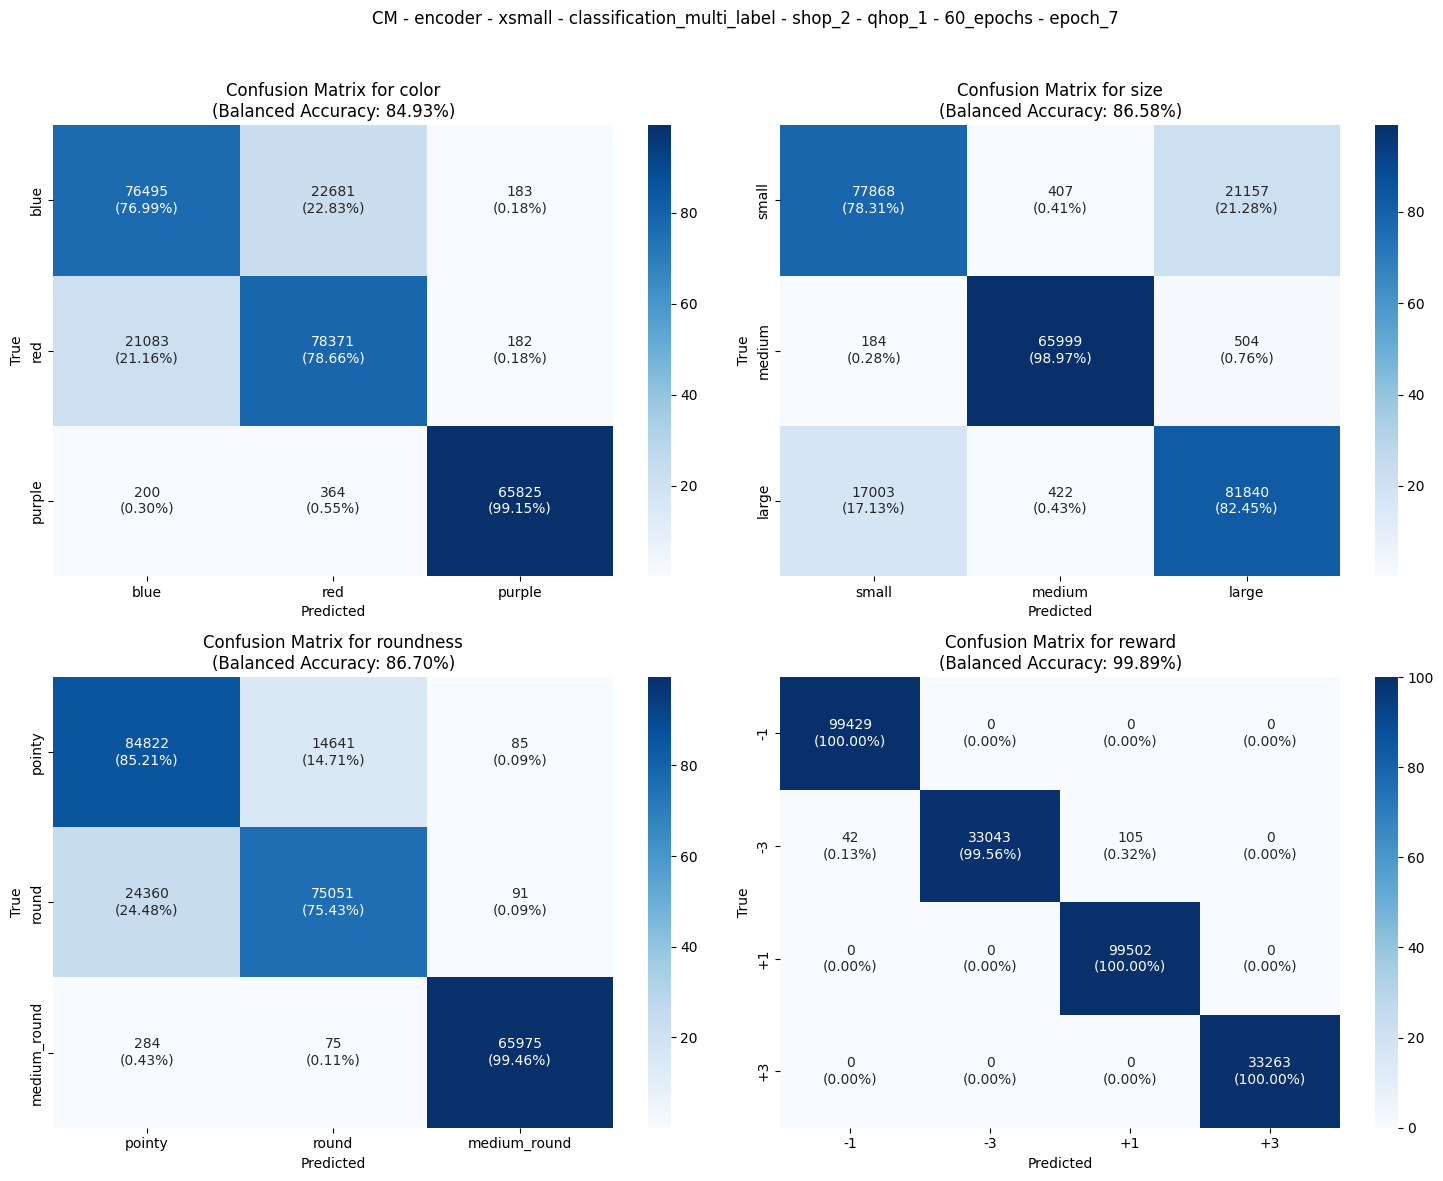

In [8]:
# Get the last epoch's predictions and targets
last_epoch_predictions = predictions_list[epoch_num - 1]
last_epoch_targets = targets_list[epoch_num - 1]


# Define feature slices and names
feature_slices = {
    'color': slice(0, 3),
    'size': slice(3, 6),
    'roundness': slice(6, 9),
    'reward': slice(9, 13)
}

feature_names = {
    'color': ['blue', 'red', 'purple'],
    'size': ['small', 'medium', 'large'],
    'roundness': ['pointy', 'round', 'medium_round'],
    'reward': ['-1', '-3', '+1', '+3']
}

# Plot confusion matrix for each feature
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, (feature, feature_slice) in enumerate(feature_slices.items()):
    pred_feature = last_epoch_predictions[:, feature_slice]
    target_feature = last_epoch_targets[:, feature_slice]
    
    pred_labels = np.argmax(pred_feature, axis=1)
    target_labels = np.argmax(target_feature, axis=1)
    
    cm = confusion_matrix(target_labels, pred_labels)
    
    with np.errstate(divide='ignore', invalid='ignore'): # Handle cases with no true samples for a class
        recalls = np.diag(cm) / np.sum(cm, axis=1)
        recalls[np.isnan(recalls)] = 0 # If a class has 0 samples, its recall is 0
    balanced_accuracy = np.mean(recalls) * 100

    cm_percentage = cm / cm.sum(axis=1, keepdims=True) * 100
    print("Total sum of the confusion matrix:", cm.sum())
    
    # Combine raw values and percentages into a single string for annotation
    annotations = np.empty_like(cm, dtype=object)
    for row in range(cm.shape[0]):
        for col in range(cm.shape[1]):
            annotations[row, col] = f"{cm[row, col]}\n({cm_percentage[row, col]:.2f}%)"
    
    sns.heatmap(cm_percentage, annot=annotations, fmt='', cmap='Blues', 
                xticklabels=feature_names[feature], 
                yticklabels=feature_names[feature],
                ax=axes[i])
    
    axes[i].set_title(f'Confusion Matrix for {feature}\n(Balanced Accuracy: {balanced_accuracy:.2f}%)')
    
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')


title = f"CM - {architecture} - {model_size} - {task_type} - shop_{shop} - qhop_{qhop} - {epochs}_epochs - epoch_{epoch_num}"
fig.suptitle(title)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust rect to make space for suptitle
plt.show()